In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
# 2000년 이후의 다우존스 지수 데이터를 야후 파이넨스로 부터 다운로드 한다. 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
# 2000년 이후의 KOSPI 데이터를 야후 파이넨스로 부터 다운로드 한다. 
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))

<Figure size 648x360 with 0 Axes>

<Figure size 648x360 with 0 Axes>

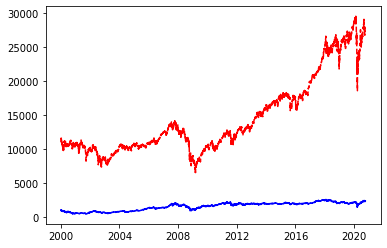

In [4]:
# 다우존스 지수를 붉은 점선으로 출력한다. 
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
# KOSPI를 푸른 실선으로 출력한다. 
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')

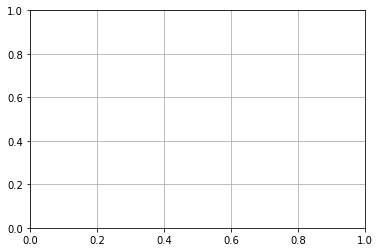

In [5]:
plt.grid(True)

No handles with labels found to put in legend.


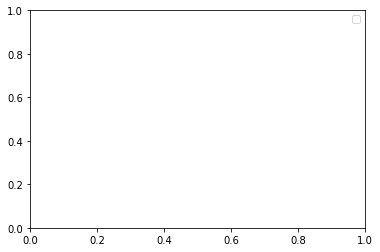

In [6]:
plt.legend(loc='best')

In [10]:
plt.show()